In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Questão 1

As frequências naturais de vibração de uma viga uniforme de comprimento unitário, fixada em um extremo e livre no outro, satisfaz a equação

$\tan(x) \tanh(x) = −1$

Encontre a menor raiz positiva dessa equação usando o método de Newton e o método da secante. Justifique a escolha das aproximações iniciais e compare os dois métodos em termos no número de iterações efetuadas.

## Avaliando a curva de $f(x)$

Podemos isolar zero do outro lado, obtendo

$f(x) = \tan(x) \tanh(x) + 1$

de forma que buscamos a menor raiz positiva $\xi$ que satisfaz $f(\xi) = 0$

In [2]:
f = lambda x: np.tan(x) * np.tanh(x) + 1

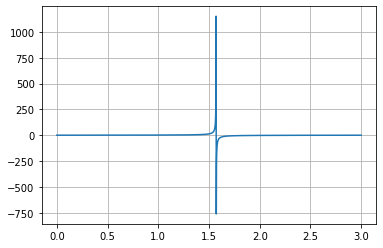

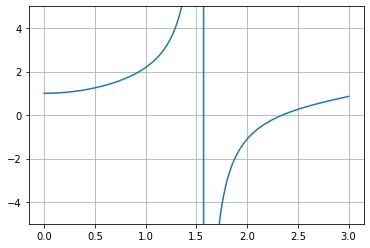

In [3]:
t = np.linspace(0, 3, 1501)
ft = f(t)

plt.plot(t, ft)
plt.grid()
plt.show()

plt.plot(t, ft)
plt.ylim((-5,5))
plt.grid()
plt.show()

Observendo as curvas de $f(x)$ no intervalo $0 \le x \le 3$ com e sem zoom, notei que há uma descontinuidade próximo de $x = \pi/2$, o que ocorre devido à descontinuidade da tangente.

No intervalo $(0, \pi/2]$, todos os valores de $f(x)$ são positivos e a curva é crescente. Em $(\pi/2, 3]$, a curva é contínua, crescente, e intercepta o eixo $x$.

Dessa forma, julgando o ponto de intersecção da curva com o eixo, notei que ele passa entre $x=2.0$ e $x=2.5$, próximo de $x=2.3$. Logo, escolhi usar as aproximações $x^{(0)} = 2.3$ para o Método de Newton e $\left(x^{(0)}, x^{(1)}\right) = (2.0, 2.5)$ para o Método da Secante.

## Método de Newton

É preciso calcular a derivada de $f(x)$.

$f'(x) = \tan'(x) \tanh(x) + \tan(x) \tanh'(x)$, pela derivada do produto

$f'(x) = \sec^2(x) \tanh(x) + \tan(x) sech^2(x)$, pelas derivadas trigonométricas e hiperbólicas

Em termos de funções presentes na biblioteca `numpy`, podemos reescrever:

$f'(x) = \frac{\tanh(x)}{\cos^2(x)} + \frac{\tan(x)}{cosh^2(x)}$

In [4]:
df = lambda x: np.tanh(x) / np.power( np.cos(x) , 2 )   +   np.tan(x) / np.power( np.cosh(x) , 2 )

In [5]:
def MetodoNewton(f,df,x0,kmax=100,tau=1.e-6):
    k = 0
    Er = [tau+1]
    x = [x0]
    print("Iteração (%d): x = %.6f" %(k, x[-1]))
    while (k <= kmax)  and  (Er[-1] > tau):
        k += 1
        x.append(x0 - f(x0)/df(x0))
        Er.append(np.abs(x[-1]-x0))
        x0 = x[-1]
        print("Iteração (%d): x = %.6f" %(k, x[-1]))
    return x,Er

In [6]:
x, Er = MetodoNewton(f, df, 2.3)

Iteração (0): x = 2.300000
Iteração (1): x = 2.344802
Iteração (2): x = 2.347041
Iteração (3): x = 2.347046
Iteração (4): x = 2.347046


In [7]:
x[-1], f(x[-1])

(2.3470455664870875, 3.3306690738754696e-16)

## Método da Secante

In [8]:
def MetodoSecante(f,x0,x1,kmax=100,epsilon=1.e-6,delta=1.e-6):
    k = 0
    Dr = [delta + 1]
    f0 = f(x0)
    f1 = f(x1)
    x = [x0, x1]
    print("Iteração (%d): x no intervalo (%.6f, %.6f)" %(k, x[-2], x[-1]))
    while (k <= kmax)  and  (np.abs(f1) > epsilon)  and  (Dr[-1] > delta):
        k += 1
        d = (f1-f0)/(x1-x0)
        x.append(x1 - f1/d)
        Dr.append(  np.abs(x[-1] - x1)  )
        x0 = x1
        f0 = f1
        x1 = x[-1]
        f1 = f(x1)
        print("Iteração (%d): x = %.6f" %(k, x[-1]))
    return x, Dr

In [9]:
x, Er = MetodoSecante(f, 2.0, 2.5)

Iteração (0): x no intervalo (2.000000, 2.500000)
Iteração (1): x = 2.403982
Iteração (2): x = 2.339145
Iteração (3): x = 2.347480
Iteração (4): x = 2.347049
Iteração (5): x = 2.347046


In [10]:
x[-1], f(x[-1])

(2.347045565047676, -2.82662293571434e-09)

## Comparação entre Métodos

Os dois métodos executaram um número similar de iterações. O Método de Newton teve uma leve vantagem, executando quatro iterações contra cinco do Método da Secante. A pequena diferença e o número baixo de iterações deve ser consequência da escolha de valores iniciais próximos de $\xi$.

Ainda, vale comentar que o Método de Newton obteve uma aproximação ligeiramente melhor, com valor mais próximo de zero ($3.33e-16$ contra $-2.83e-9$).

# Questão 2

Use o método de Newton para resolver o sistema de equações não-lineares

$$
\begin{cases}
16x^4 + 16y^4 + z^4 = 16 \\
x^2 + y^2 + z^2 = 3 \\
x^3 − y = 0
\end{cases}
$$



Comente o número de iterações efetuados e discuta a taxa de convergência do método de Newton.

## Avaliando o Sistema de Equações

Realizando uma análise gráfica das equações, julguei $x^{(0)} = [1.0, 1.0, 1.0]^T$ um bom valor inicial, por parecer suficientemente próximo do encontro das três figuras.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  from ipykernel import kernelapp as app


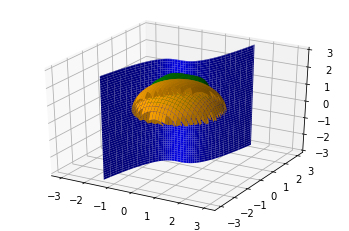

In [11]:
n3 = np.linspace(-3, 3, 601)
x1, y1 = np.meshgrid(n3, n3)
z1 = np.power(16 * (1 - np.power(x1,4) - np.power(y1,4)), 0.25)

x2, y2 = np.meshgrid(n3, n3)
z2 = np.sqrt(3 - np.power(x2,2) - np.power(y2,2))

cbrt3 = np.power(3, 1/3)
x3, z3 = np.meshgrid(np.linspace(-cbrt3, cbrt3, 601), n3)
y3 = np.power(x3, 3)

ax = plt.axes(projection="3d")
ax.plot_surface(x3,y3,z3, color="blue")
ax.plot_surface(x1,y1,z1, color="green")
ax.plot_surface(x2,y2,z2, color="orange")

## Cálculo de $F(x)$ e $J(x)$

Isolando o zero nas equações, obtemos o adequado valor de $F(x)$.

$$F(x) =
\begin{bmatrix}
16x^4 + 16y^4 + z^4 - 16 \\
x^2 + y^2 + z^2 - 3 \\
x^3 − y
\end{bmatrix}
$$

Realizando as derivadas parciais adequadas, podemos determinar a matriz Jacobiana $J(x)$.

$$J(x) =
\begin{bmatrix}
64x^3 & 64y^3 & 4z^3 \\
2x & 2y & 2z \\
3x^2 & − 1 & 0
\end{bmatrix}
$$

In [12]:
F = lambda x: np.array([16*x[0]**4 + 16*x[1]**4 + x[2]**4 - 16,
                        x[0]**2 + x[1]**2 + x[2]**2 - 3,
                        x[0]**3 - x[1]])

J = lambda x: np.array([[64*x[0]**3, 64*x[1]**3, 4*x[2]**3],
                        [2*x[0], 2*x[1], 2*x[2]],
                        [3*x[0]**2, - np.ones_like(x[1]), np.zeros_like(x[2])]])

## Método de Newton para Resolução de Sistemas Não Lineares

In [13]:
def MetodoNewtonSNL(F,J,X0,kmax=100,tau=1.e-6, epsilon=1.e-6):
    k = 0
    Er = [tau+1]
    X = [X0]
    FX = F(X0)
    print("Iteração (%d): ||Fx||_inf = %.7f" %(k, np.linalg.norm(FX,np.inf)))
    while (k <= kmax)  and  (Er[-1] > tau)  and  (np.linalg.norm(FX,np.inf) > epsilon):
        k += 1
        s = np.linalg.solve(J(X[-1]), -F(X[-1]))
        X.append(X[-1] + s)
        Er.append(np.linalg.norm(s,np.inf))
        FX = F(X[-1])
        print("Iteração (%d): ||Fx||_inf = %.7f" %(k, np.linalg.norm(FX,np.inf)))
    return X,Er

In [14]:
X0 = np.array([1.0, 1.0, 1.0])
X, Er = MetodoNewtonSNL(F, J, X0)

Iteração (0): ||Fx||_inf = 17.0000000
Iteração (1): ||Fx||_inf = 4.7919171
Iteração (2): ||Fx||_inf = 0.6453095
Iteração (3): ||Fx||_inf = 0.0184509
Iteração (4): ||Fx||_inf = 0.0000148
Iteração (5): ||Fx||_inf = 0.0000000


In [15]:
X[-1], F(X[-1])

(array([0.87796576, 0.67675697, 1.33085541]),
 array([9.29389898e-12, 2.04281037e-13, 1.42219569e-13]))

O Método de Newton encontrou uma solução válida e convergiu rapidamente, com apenas cinco iterações.

## Análise da Convergência

Taxa de Covergência Quadrática na Iteração (1): 0.28333276666751667
Taxa de Covergência Quadrática na Iteração (2): 1.174971994846843
Taxa de Covergência Quadrática na Iteração (3): 1.7962317429522814
Taxa de Covergência Quadrática na Iteração (4): 1.7126404698681037
Taxa de Covergência Quadrática na Iteração (5): 1.7414926609793575



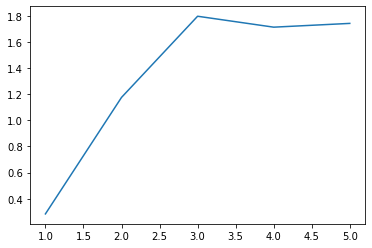

In [16]:
convergencia = list()
for k in range(len(Er) - 1):
    print(f"Taxa de Covergência Quadrática na Iteração ({k+1}): {Er[k+1]/Er[k]**2}")
    convergencia.append(Er[k+1]/Er[k]**2)


print()
plt.plot([i+1 for i in range(5)], convergencia)
plt.show()

Text(0, 0.5, 'Erro $||s||_\\infty$')

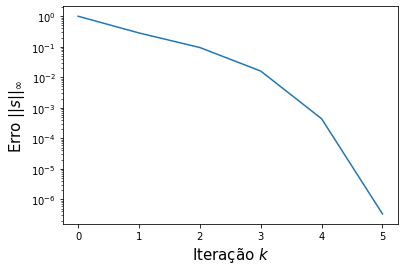

In [17]:
plt.semilogy(Er)
plt.xlabel("Iteração $k$", fontdict={"size":15})
plt.ylabel("Erro $||s||_\infty$", fontdict={"size":15})

Observando a taxa de convergência, nota-se que ela aparenta um comportamento quadrático.

Isso é evidenciado pela:
* Tendência de `Er[k+1]/Er[k]**2` convergir para um valor maior que zero com o aumento de $k$
* Curva similar a uma parábola no gráfico semilog de $k$ por $\left\lVert s \right\rVert_\infty$

Provavelmente, a boa escolha do valor inicial e a convergência quadrática estimularam o baixo número de iterações.